<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-Dahemo76/blob/main/Semana7/A01793538_kmeans_target.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ACTIVIDAD SEMANA 7 Regresiones y K means**

**MATERIA : CIENCIA DE DATOS**

**ALUMNO : DANIEL HERNANDEZ MORA**

**MATRICULA : A01793538**

**TUTOR : BERNARDO CHARLES CANALES**

**PROFESORA TITULAR : MARIA DE LA PAZ RICO FERNANDEZ**

**09 de Noviembre de 2022**

Este notebook se basa en información de target
![imagen.png](https://www.america-retail.com/static//2020/12/target01.jpg)


Ahora imagina que somos parte del equipo de data science de la empresa Target, una de las tiendas con mayor presencia en Estados Unidos. El departamento de logistica acude a nosotros para saber donde le conviene poner sus almacenes, para que se optimice el gasto de gasolina, los tiempos de entrega de los productos y se disminuyan costos. Para ello, nos pasan los datos de latitud y longitud de cada una de las tiendas.

https://www.kaggle.com/datasets/saejinmahlauheinert/target-store-locations?select=target-locations.csv

Si quieres saber un poco más de graficas geográficas consulta el siguiente notebook
https://colab.research.google.com/github/QuantEcon/quantecon-notebooks-datascience/blob/master/applications/maps.ipynb#scrollTo=uo2oPtSCeAOz

In [79]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [80]:
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas

Importa la base de datos

In [81]:
url="https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"
df=pd.read_csv(url)

Exploremos los datos.

In [82]:

df.head()


,name,latitude,longitude,address,phone,website
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1839 non-null   object 
 1   latitude   1839 non-null   float64
 2   longitude  1839 non-null   float64
 3   address    1839 non-null   object 
 4   phone      1839 non-null   object 
 5   website    1839 non-null   object 
dtypes: float64(2), object(4)
memory usage: 86.3+ KB


**Definición de Latitud y Longitud**

**Latitud** Es la distancia en grados, minutos y segundos que hay con respecto al paralelo principal, que es el ecuador (0º). La latitud puede ser norte y sur.

**Longitud**: Es la distancia en grados, minutos y segundos que hay con respecto al meridiano principal, que es el meridiano de Greenwich (0º).La longitud puede ser este y oeste.

In [84]:
latlong=df[["latitude","longitude"]]

¡Visualizemos los datos!, para empezar a notar algún patron. 

A simple vista pudieramos pensar que tenemos algunos datos atípicos u outliers, pero .... no es así, simplemente esta grafica no nos está dando toda la información.

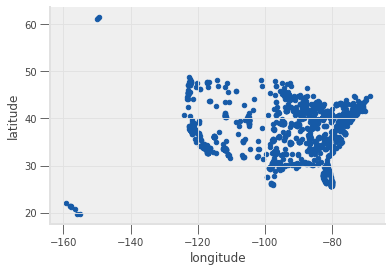

In [85]:
#extrae los datos interesantes
latlong.plot.scatter( "longitude","latitude")

In [86]:
latlong.describe()

,latitude,longitude
count,1839.000000,1839.000000
mean,37.791238,-91.986881
std,5.272299,16.108046
min,19.647855,-159.376962
25%,33.882605,-98.268828
50%,38.955432,-87.746346
75%,41.658341,-80.084833
max,61.577919,-68.742331


Para entender un poco más, nos auxiliaremos de una librería para graficar datos geográficos. Esto nos ayudara a tener un mejor entendimiento de ellos.




In [87]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [88]:
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417369999999 33.2242254)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98977789999999 33.3345501)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593169999999 30.6028747)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.9715595 34.5601477)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.4464222 31.2660613)


In [89]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


In [90]:
#mapa

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [91]:
#graficar el mapa
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

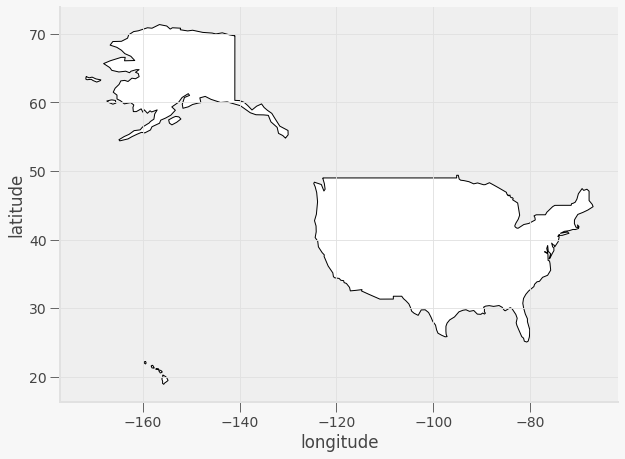

In [92]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

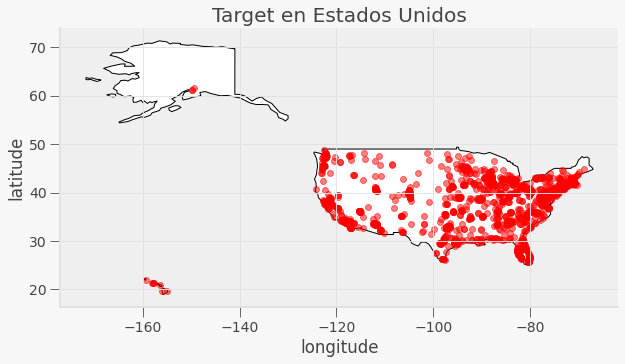

In [93]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

¿qué tal ahora?, tiene mayor sentido verdad, entonces los datos lejanos no eran atípicos, de aquí la importancia de ver los datos con el tipo de gráfica correcta.

Ahora sí, implementa K means a los datos de latitud y longitud :) y encuentra donde colocar los almacenes. 

Nota: si te llama la atención implementar alguna otra visualización con otra librería, lo puedes hacer, no hay restricciones.

In [111]:
from sklearn.cluster import KMeans

In [112]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters] 
Y_axis = latlong[['latitude']]
X_axis = latlong[['longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))] 

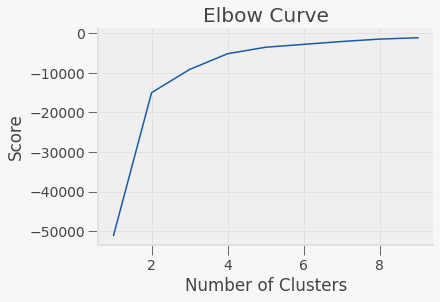

In [113]:
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

**En la gráfica de codo podemos ver como en el nivel 4 se decrementa sustancialmente la inercia para despues tener un coportamiento practicamente lineal, es la razon por la cual, escogeré 4 como el numero óptimo de cluster para aplicarse en el modelo de K mean**

In [114]:
kmeans = KMeans(n_clusters = 4, init ='k-means++') 
kmeans.fit(latlong[latlong.columns[0:2]])
labels = kmeans.labels_
labels

array([3, 3, 3, ..., 1, 1, 2], dtype=int32)

**Debido a que consideramos el numero de cluster igual a 4, esos significa que entonces nos enfocaremos en desarrollar 4 centroides para poder definir las coordenadas de las 4 tiendas que pensamos tendrán la distribución geográfica promedio esperada**

In [115]:
X = df[["longitude","latitude"]]
kmeans = KMeans(n_clusters=4).fit(X)
centroids = kmeans.cluster_centers_ 
labels = kmeans.predict(X)
C = kmeans.cluster_centers_

Center_DF = pd.DataFrame(C) 
Center_DF["Coordinates"] = list(zip(Center_DF[0], Center_DF[1])) 
Center_DF["Coordinates"] = Center_DF["Coordinates"].apply(Point)


gdf_Center = gpd.GeoDataFrame(Center_DF, geometry="Coordinates") 
gdf_Center

,0,1,Coordinates
0,-84.792984,36.546645,POINT (-84.79298 36.54665)
1,-119.146456,37.577577,POINT (-119.14646 37.57758)
2,-75.267201,40.341984,POINT (-75.26720 40.34198)
3,-96.957199,37.008762,POINT (-96.95720 37.00876)


**En base a las coordenadas, procedemos a graficar en el mapa de Estados Unidos la distribución geográfica de las tiendas, la funcion a utilizar es el plot del dataframe gdf_center, donde guardamos las coordenadas de las nuevas tiendas**

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning


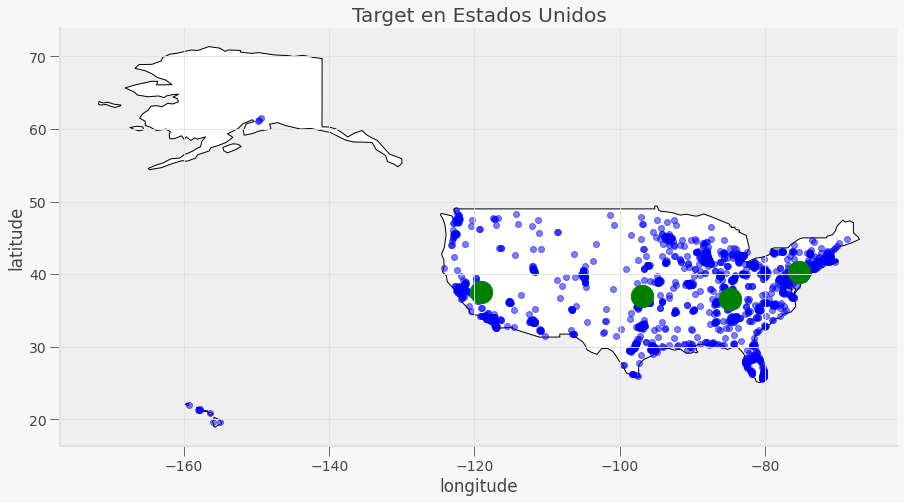

In [117]:
fig, gax = plt.subplots(figsize=(15,10))

world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white') 


gdf.plot(ax=gax, column= "cluster_label", color='blue', alpha = 0.5) 
gdf_Center.plot(ax=gax, color='green', alpha = 1, markersize = 500) 


gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [118]:
latlong['kmeans'] = kmeans.labels_ 
latlong.loc[:, 'kmeans'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0    615
2    454
3    401
1    369
Name: kmeans, dtype: int64

In [119]:
gdf_Center

,0,1,Coordinates
0,-84.792984,36.546645,POINT (-84.79298 36.54665)
1,-119.146456,37.577577,POINT (-119.14646 37.57758)
2,-75.267201,40.341984,POINT (-75.26720 40.34198)
3,-96.957199,37.008762,POINT (-96.95720 37.00876)


In [120]:
from pandas.core.internals.concat import concat_arrays


Location1 = str(gdf_Center[1][0]) + ", " + str(gdf_Center[0][0]) #Aqui es alrevez, osea la coordenada x esta en la columna 1, y la y en la columna 0 , por eso medio misterioso esta llamada
print(Location1)
Location2 = str(gdf_Center[1][1]) + ", " + str(gdf_Center[0][1])
print(Location2)
Location3 = str(gdf_Center[1][2]) + ", " + str(gdf_Center[0][2])
print(Location3)
Location4 = str(gdf_Center[1][2]) + ", " + str(gdf_Center[0][3])
print(Location3)


36.54664540829268, -84.79298400162601
37.57757741219512, -119.14645561138212
40.34198355132158, -75.26720101629957
40.34198355132158, -75.26720101629957


**Utilizando las librerias de Geopy,en específcio la Geocodificación inversa con GeoPy nos permite encontrar la dirección que corresponde a un conjunto de coordenadas**

In [125]:
 
from geopy.geocoders.yandex import Location
from geopy.geocoders import Nominatim 
from geopy.distance import geodesic

geolocator = Nominatim(user_agent="my-application") 
Locations = [Location1, Location2, Location3, Location4 ]

for i in Locations:
  location = geolocator.reverse(i)  
  print('almacen en ---', location.address)


almacen en --- SR 154, Pickett County, Tennessee, United States
almacen en --- Mammoth Trail, Madera County, California, United States
almacen en --- Green Street, Hilltown Township, Bucks County, Pennsylvania, 18962, United States
almacen en --- 580 Avenue, Jefferson County, Nebraska, 68341, United States


**Geopy puede calcular la distancia geodésica entre dos puntos utilizando la distancia geodésica, con un valor predeterminado de la distancia geodésica disponible como la función geopy.distance.distance, por lo que utilizamos esta función para calcular la distancia entre nuestras tiendas**

In [122]:
distancia1 = str(geodesic(Location1, Location2).miles)
print("\nDistancia entre el primer y segundo almacén : ", distancia1, " ml \n") 
distancia2 = str(geodesic(Location2, Location3).miles)
print("Distancia entre el segundo y tercer almacén : ", distancia2, " ml \n")
distancia3 = str(geodesic(Location3, Location4).miles)
print("Distancia entre el Tercer y cuarto almacén : ", distancia2, " ml \n")



Distancia entre el primer y segundo almacén :  1889.2339637145571  ml 

Distancia entre el segundo y tercer almacén :  2346.708041565729  ml 

Distancia entre el Tercer y cuarto almacén :  2346.708041565729  ml 



#**CONCLUSIONES**

**El analisis de este ejercicio es por demás interesante, ya que nos permite poder visualizar en base a la correlación de las distancias entre las tiendas actuales, una ubicación sugerida en la distancia de las nuevas tiendas entre si y con respecto a las tiendas actuales.**

**Utilizando la metodlogía de Kmean podemos utilizar la información histórica  para poder tener un modelo de operación que eficiente los gastos de operación de las tiendas futuras, al menos en cuanto optimización de insumos de gasolina y tiempos de entrega de los productos. Existen mas variables que no se están considerando actualmente, que podria influir en la decisión ( como el costo de la energia electrica, permisos gubernamentales, costo de la mano de obra, etc)**

**Por otro lado, vale la pena visualizar graficamente donde su ubicarán las nuevas entiendas, porque nos permite corroborar rapidamente si el calculo realizado tiene sentido, y si no es una resultado fuera de lugar**